In [7]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import burst_detector as bd

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [8]:
# loading data
fs = 30000
times = np.load('../results/s0_matlab/spike_times.npy').flatten()/fs
clusters_old = np.load('../results/s0_matlab/spike_clusters.npy').flatten()
amplitudes = np.load('../results/s0_matlab/amplitudes.npy').flatten()

n_clusters = np.unique(clusters_old).size
n = times.shape[0]

In [9]:
# fix cluster numbering
clusters, fix_clust = bd.fix_clust_ids(clusters_old, n_clusters)

# count overlapping spikes
olap_norm = bd.overlap_norm(times, clusters, n_clusters, fs)

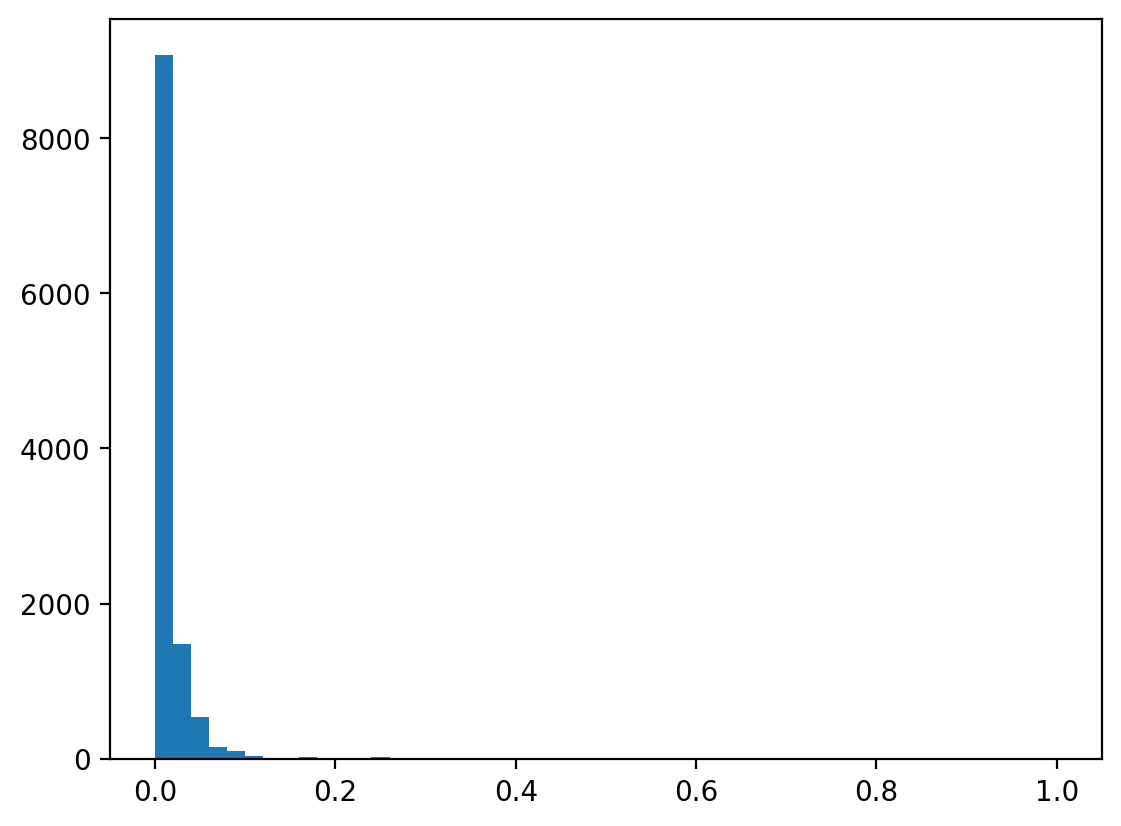

In [10]:
plt.hist(olap_norm.flatten(), bins=50);

In [11]:
x = []
y = []
for i in np.arange(n_clusters):
    for j in np.arange(i+1, n_clusters):
        x.append(olap_norm[i,j])
        y.append(olap_norm[j,i])

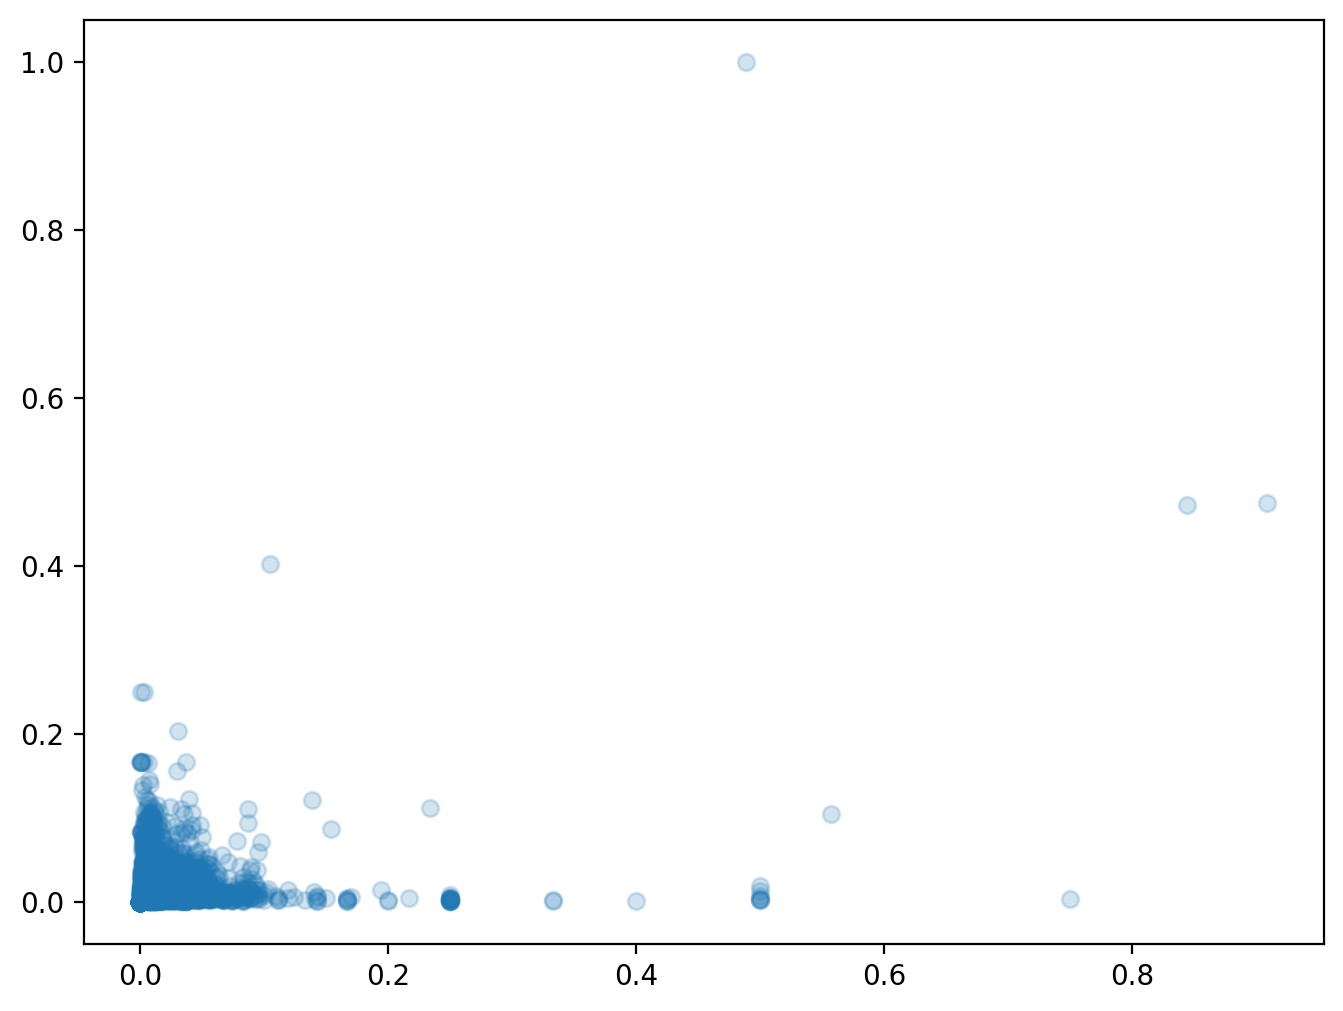

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha = 0.2)
# plt.scatter(x_prob, y_prob, alpha=0.7, color='r')